/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


,MultinomialNB_counts,MultinomialNB_tfidf,LogisticRegression_counts,LogisticRegression_tfidf
accuracy,0.880,0.880,0.891,0.896
f1_score,0.880,0.880,0.890,0.895
precision,0.879,0.879,0.890,0.895
recall,0.880,0.880,0.891,0.896
roc_auc_score,0.971,0.973,0.977,0.980


Confusion matrix of NB Counts :


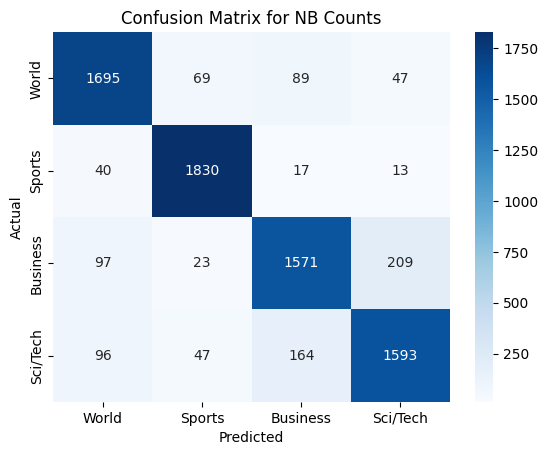

Confusion matrix of NB TFIDF :


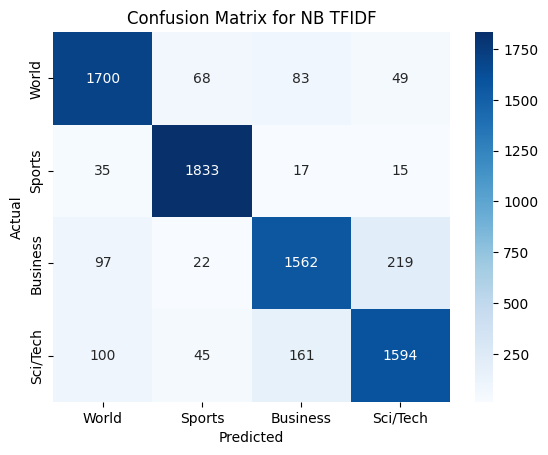

Confusion matrix of LR Counts :


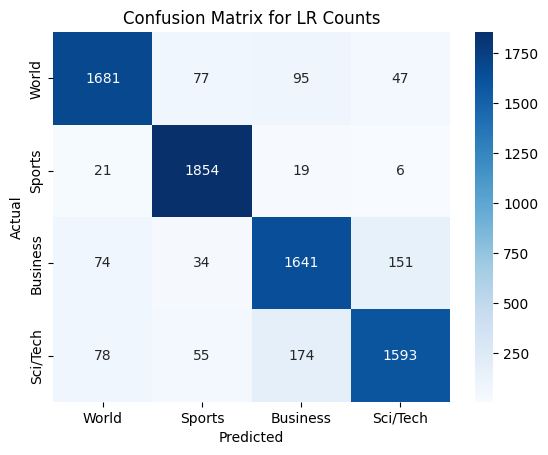

Confusion matrix of LR TFIDF :


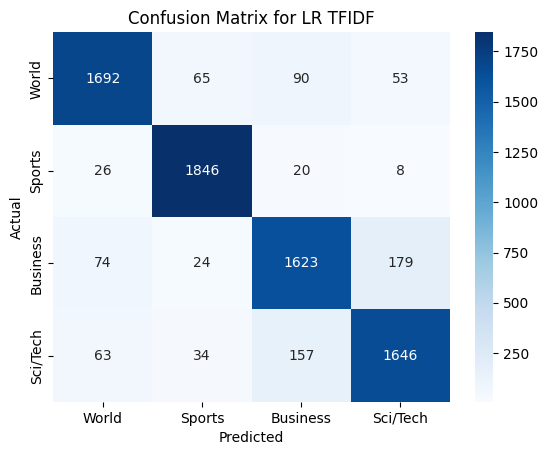

In [1]:
#installing datasets
!pip install -q datasets
#IMPORT
import string
import pandas as pd
from datasets import load_dataset
#LOAD ag_news
ag_news=load_dataset('ag_news')
#split into train test dataframes
df_train=pd.DataFrame({'text':ag_news['train']['text'],'label':ag_news['train']['label']})
df_test=pd.DataFrame({'text':ag_news['test']['text'],'label':ag_news['test']['label']})
df_train['label'].value_counts()
#STANDAIDIZING TEXT
df_train['text']=df_train['text'].str.lower().str.replace(r'[^\w\s]'," ",regex=True)
df_test['text']=df_test['text'].str.lower().str.replace(r'[^\w\s]'," ",regex=True)
#VECTORIZATION
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
tfidf=TfidfVectorizer(stop_words='english',max_features=3000, ngram_range=(1,2))
cv=CountVectorizer(stop_words='english',max_features=3000, ngram_range=(1,2))
x_train_tfidf=tfidf.fit_transform(df_train['text'])
x_test_tfidf=tfidf.transform(df_test['text'])
x_train_cv=cv.fit_transform(df_train['text'])
x_test_cv=cv.transform(df_test['text'])

y_train=df_train['label']
y_test=df_test['label']

#TRAIN A CLASSIFIER (NAIVE BAYES AND LOGISTIC REGRESSION)
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
clf=MultinomialNB()
clf_counts=clf.fit(x_train_cv,y_train)
clf_tfidf=clf.fit(x_train_tfidf,y_train)
lr=LogisticRegression(max_iter=500,solver='liblinear',penalty='l2',C=1.0,random_state=42)
lr_counts=lr.fit(x_train_cv,y_train)
lr_tfidf=lr.fit(x_train_tfidf,y_train)

#PREDICTION
y_pred_counts=clf_counts.predict(x_test_cv)
y_pred_tfidf=clf_tfidf.predict(x_test_tfidf)
y_pred_lr_counts=lr_counts.predict(x_test_cv)
y_pred_lr_tfidf=lr_tfidf.predict(x_test_tfidf)
y_proba_counts=clf_counts.predict_proba(x_test_cv)
y_proba_tfidf=clf_tfidf.predict_proba(x_test_tfidf)
y_proba_lr_counts=lr_counts.predict_proba(x_test_cv)
y_proba_lr_tfidf=lr_tfidf.predict_proba(x_test_tfidf)

#EVALUATION
def evaluation(y_pred,y_proba):
  from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
  return [
      round(accuracy_score(y_test,y_pred),3),
      round(f1_score(y_test,y_pred,average='weighted'),3),
      round(precision_score(y_test,y_pred,average='weighted'),3),
      round(recall_score(y_test,y_pred,average='weighted'),3),
      round(roc_auc_score(y_test,y_proba,multi_class='ovr'),3)
     ]
results={"MultinomialNB_counts":evaluation(y_pred_counts,y_proba_counts),
         "MultinomialNB_tfidf":evaluation(y_pred_tfidf,y_proba_tfidf),
         "LogisticRegression_counts":evaluation(y_pred_lr_counts,y_proba_lr_counts),
         "LogisticRegression_tfidf":evaluation(y_pred_lr_tfidf,y_proba_lr_tfidf)

}
results=pd.DataFrame(results,index=['accuracy','f1_score','precision','recall','roc_auc_score'])
display(results.head())

#CONFUSION MATRIX
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(name, y_test, y_pred, labels):
  print(f"Confusion matrix of {name} :")
  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, fmt="2f", cmap="Blues", yticklabels=labels, xticklabels=labels)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title(f"Confusion Matrix for {name}")
  plt.show()

# Define the class labels
class_labels = ['World', 'Sports', 'Business', 'Sci/Tech']

plot_confusion_matrix("NB Counts", y_test, y_pred_counts, class_labels)
plot_confusion_matrix("NB TFIDF", y_test, y_pred_tfidf, class_labels)
plot_confusion_matrix("LR Counts", y_test, y_pred_lr_counts, class_labels)
plot_confusion_matrix("LR TFIDF", y_test, y_pred_lr_tfidf, class_labels)

# AG News Classification with Naive Bayes & Logistic Regression
This notebook demonstrates text classification on the AG News dataset using two classic machine learning models:
- Multinomial Naive Bayes
- Logistic Regression

We evaluate models using **TF-IDF** and **CountVectorizer** features and compare performance with accuracy, F1-score, precision, recall, ROC-AUC, and confusion matrices.


## 1. Import Libraries


## 2. Load the AG News Dataset
We use the `datasets` library to fetch the AG News dataset and convert it into pandas DataFrames.


## 3. Text Preprocessing
- Convert to lowercase
- Remove punctuation
- Prepare train/test splits


## 4. Feature Extraction
We use:
- CountVectorizer (BoW)
- TF-IDF Vectorizer
with n-grams (1,2).


## 5. Train Models
We train:
- Multinomial Naive Bayes (with Count + TF-IDF)
- Logistic Regression (with Count + TF-IDF)


## 6. Model Predictions
We generate predicted labels and prediction probabilities for evaluation.


## 7. Evaluation Metrics
We calculate:
- Accuracy
- F1-score
- Precision
- Recall
- ROC-AUC (multi-class OVR)


## 8. Confusion Matrices
Visualizing confusion matrices for each model with Seaborn heatmaps.


## 9. Save Trained Models
We save trained models and vectorizers using joblib for reuse.


## 10. Conclusion
- Logistic Regression (TF-IDF) usually performs better on text classification tasks compared to Naive Bayes.
- TF-IDF features generally outperform CountVectorizer due to capturing word importance.
